In [9]:
"""
Quantum Addition Circuit
Kvantový sčítačový obvod

This program simulates a quantum circuit for binary based addition on the ripple-carry method using Qiskit.
Tento program simuluje kvantový obvod pro binární sčítání na bázi ripple-carry metody pomocí Qiskitu.

Author: Michal Forgó
Autor: Michal Forgó

Time: 02.11.2025
Čas: 02.11.2025

Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.
Poznámka: Před spuštěním tohoto notebooku se ujistěte, že máte nainstalované requiremnts.txt nebo enviroment.yml.
"""

'\nQuantum Addition Circuit\nKvantový sčítačový obvod\n\nThis program simulates a quantum circuit for binary based addition on the ripple-carry method using Qiskit.\nTento program simuluje kvantový obvod pro binární sčítání na bázi ripple-carry metody pomocí Qiskitu.\n\nAuthor: Michal Forgó\nAutor: Michal Forgó\n\nTime: 02.11.2025\nČas: 02.11.2025\n\nNote: Ensure you have installed the requirements.txt or environment.yml before running this notebook.\nPoznámka: Před spuštěním tohoto notebooku se ujistěte, že máte nainstalované requiremnts.txt nebo enviroment.yml.\n'

In [10]:
# Importing libraries
# Importování knihoven
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [11]:
while True:
    # Get two binary numbers (max 7 bits)
    # Získejte dvě binární čísla (max 7 bitů)
    firstBinaryNumber = input("Enter a 7-bit or less binary number: ")
    secondBinaryNumber = input("Enter another 7-bit or less binary number: ")

    # Validate input length and that input contains only 1s or 0s
    # Ověření délky vstupu a toho že vstup obsahuje pouze 1 nebo 0
    if len(firstBinaryNumber) > 8 or len(secondBinaryNumber) > 8 or \
    not set(firstBinaryNumber).issubset({'0','1'}) or not set(secondBinaryNumber).issubset({'0','1'}):
        print("Please enter valid inputs. Try again.")  # Error message / Chybová zpráva
    else:
        break  # Exit loop if input is valid / Ukončí smyčku, pokud je vstup platný

# Determine the maximum input length
# Určení maximální délky vstupu
maxInputLength = max(len(firstBinaryNumber), len(secondBinaryNumber))

In [12]:
'''
Initializing registers:
- Two quantum registers (regA, regB) for input numbers
- One quantum register (regC) for carry bits
- One classical register (regD) to store the final sum

Inicializace registrů:
- Dva kvantové registry (regA, regB) pro vstupní čísla
- Jeden kvantový registr (regC) pro přenosové bity
- Jeden klasický registr (regD) pro konečný součet
'''

# Quantum registers for input and calculations
# Kvantové registry pro vstup a výpočty
regA = QuantumRegister(maxInputLength, "regA")        # First number / První číslo
regB = QuantumRegister(maxInputLength + 1, "regB")    # Second number & sum / Druhé číslo a součet
regC = QuantumRegister(maxInputLength, "regC")        # Carry bits / Přenosové bity

# Classical register for measurement
# Klasický registr pro měření
regD = ClassicalRegister(maxInputLength + 1, "regD")  # Final output / Konečný výstup

# Create the quantum circuit
# Vytvoření kvantového obvodu
qc = QuantumCircuit(regA, regB, regC, regD)

01111


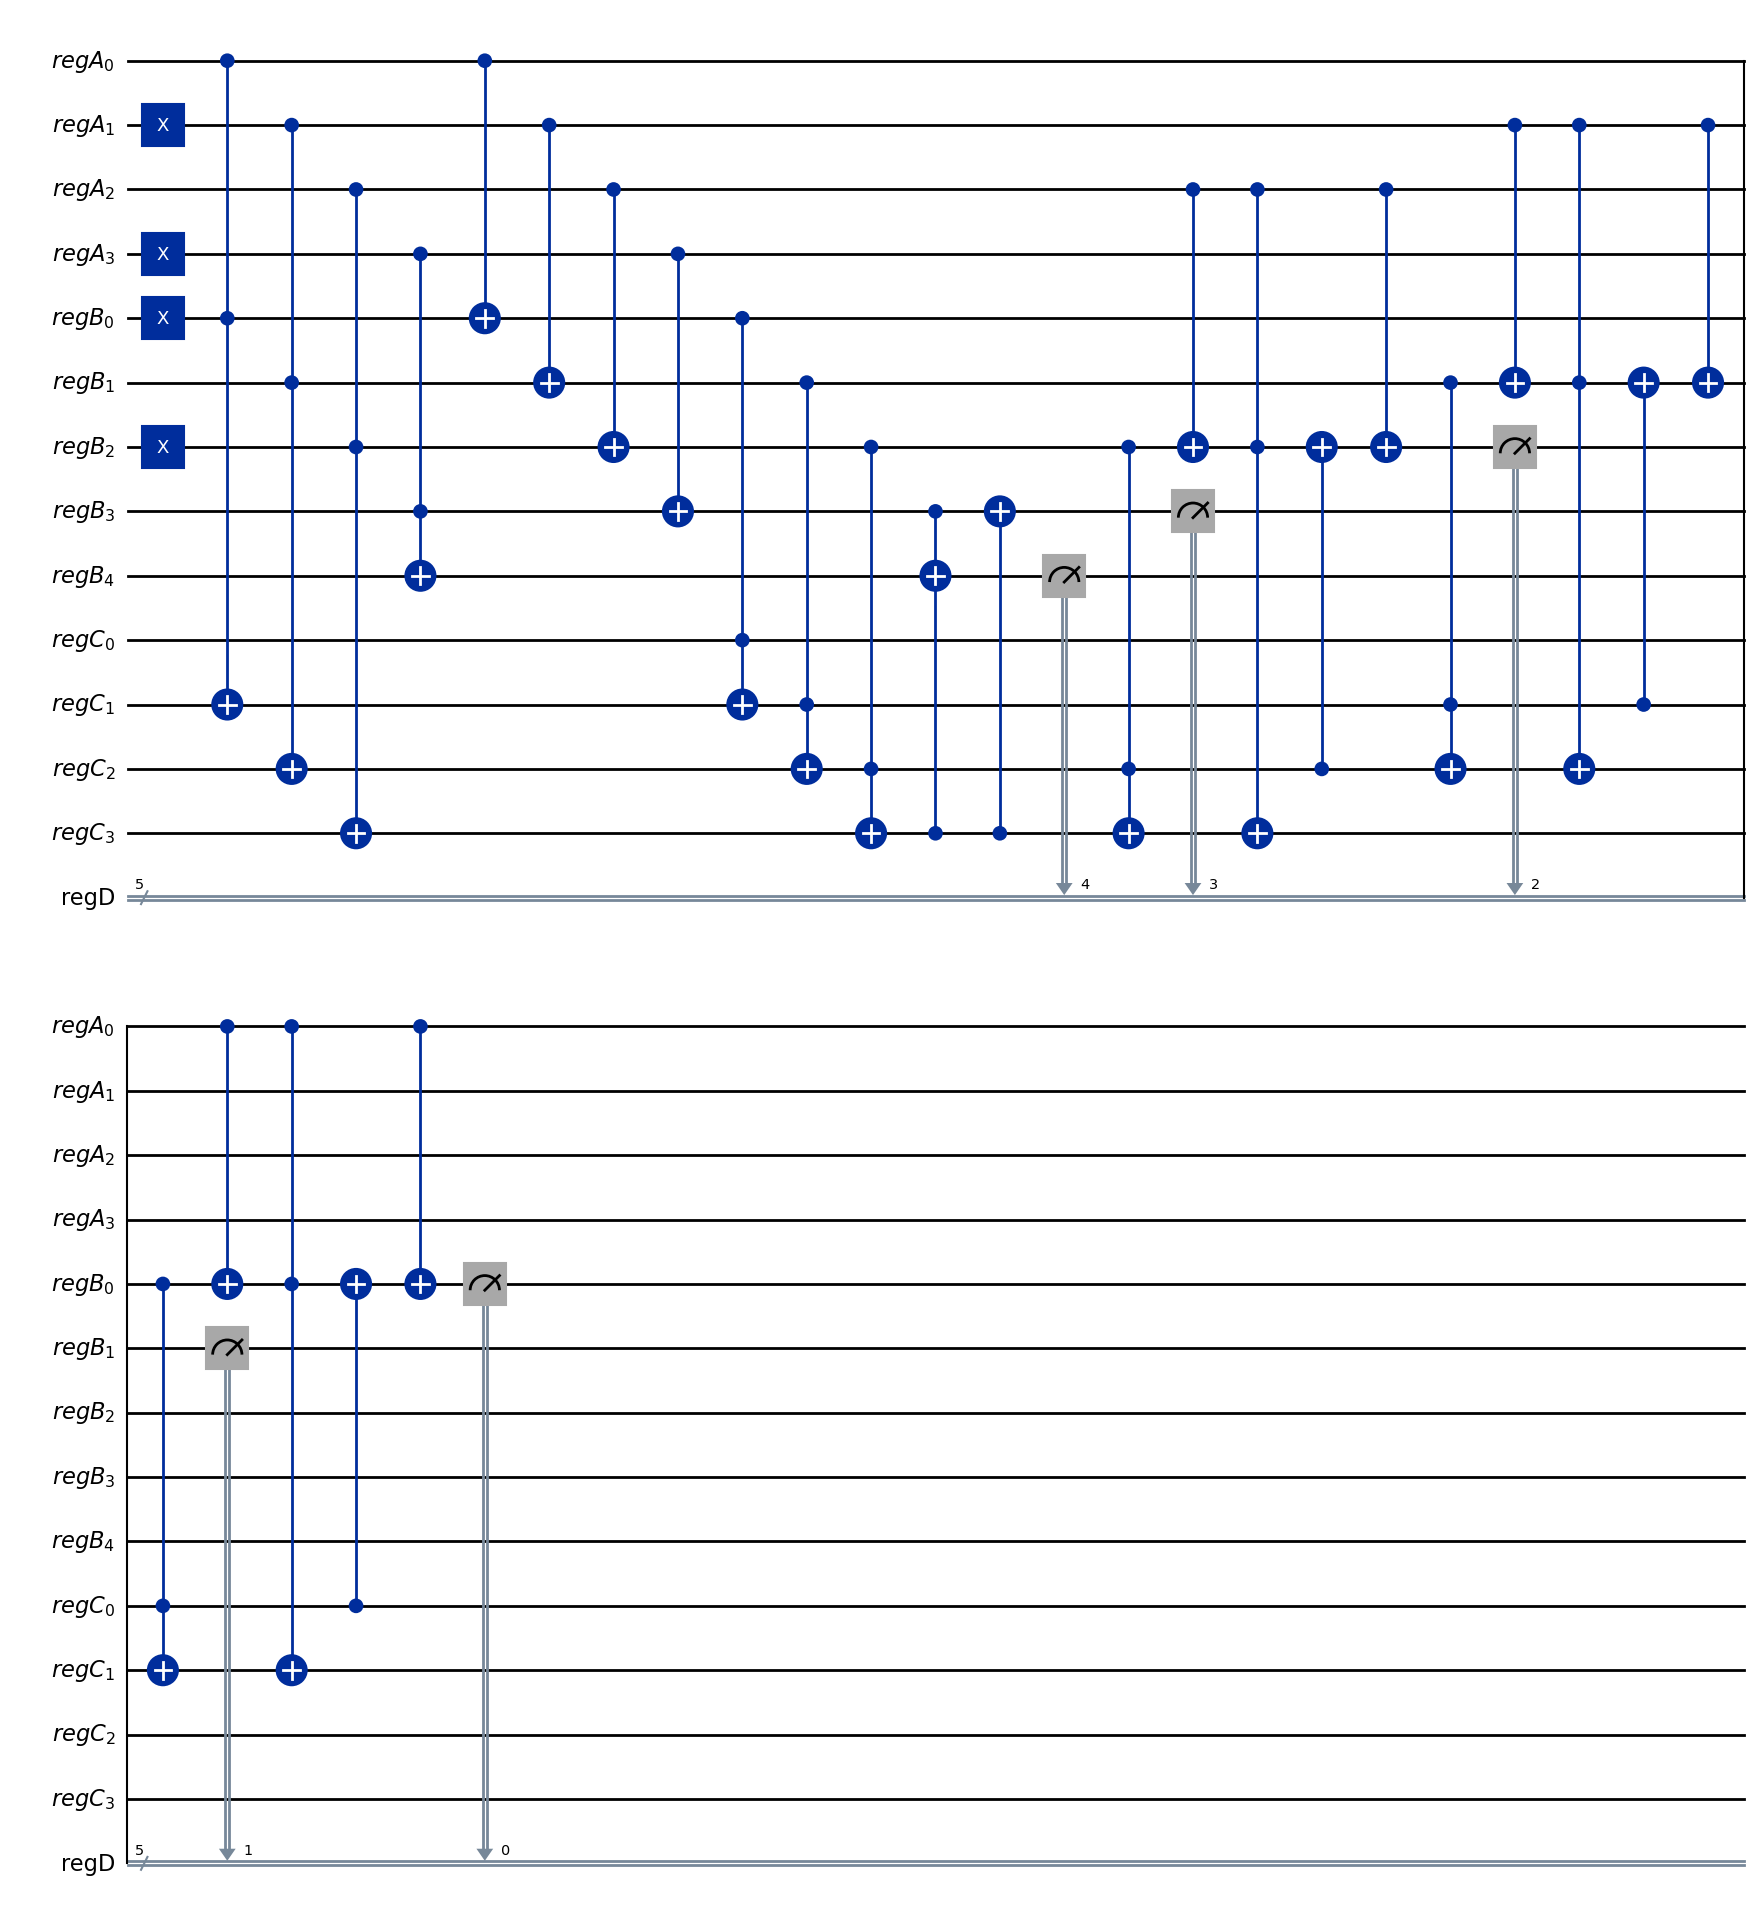

In [13]:
# Setting up the quantum registers to store input values
# Nastavení kvantových registrů pro uložení vstupních hodnot
for idx, val in enumerate(firstBinaryNumber):
    if val == "1":
        qc.x(regA[len(firstBinaryNumber) - (idx + 1)])  # Apply X gate / Aplikace X brány

for idx, val in enumerate(secondBinaryNumber):
    if val == "1":
        qc.x(regB[len(secondBinaryNumber) - (idx + 1)])  # Apply X gate / Aplikace X brány

# Implementing carry gate logic for addition
# Implementace přenosové brány pro sčítání
for i in range(maxInputLength - 1):
    qc.ccx(regA[i], regB[i], regC[i + 1])  # Compute carry / Výpočet přenosu
    qc.cx(regA[i], regB[i])  # Partial sum / Částečný součet
    qc.ccx(regC[i], regB[i], regC[i + 1])  # Update carry / Aktualizace přenosu

# Final carry computation using regB[maxInputLength] instead of regC[maxInputLength]
# Konečný výpočet přenosu pomocí regB[maxInputLength] místo regC[maxInputLength]
qc.ccx(regA[maxInputLength - 1], regB[maxInputLength - 1], regB[maxInputLength])
qc.cx(regA[maxInputLength - 1], regB[maxInputLength - 1])
qc.ccx(regC[maxInputLength - 1], regB[maxInputLength - 1], regB[maxInputLength])

# Undo last carry operation to reset the state
# Vrácení poslední přenosové operace pro reset stavu
qc.cx(regC[maxInputLength - 1], regB[maxInputLength - 1])

# Reverse the carry operations to reset all carry bits to |0>
# Reverzní operace přenosu pro reset všech přenosových bitů na |0>
for i in range(maxInputLength - 1):
    qc.ccx(regC[(maxInputLength - 2) - i], regB[(maxInputLength - 2) - i], regC[(maxInputLength - 1) - i])
    qc.cx(regA[(maxInputLength - 2) - i], regB[(maxInputLength - 2) - i])
    qc.ccx(regA[(maxInputLength - 2) - i], regB[(maxInputLength - 2) - i], regC[(maxInputLength - 1) - i])
    
    # These operations act as a sum gate: flips regB if control is |1>
    # Tyto operace fungují jako součtová brána: přepínají regB, pokud je řídicí bit |1>
    qc.cx(regC[(maxInputLength - 2) - i], regB[(maxInputLength - 2) - i])
    qc.cx(regA[(maxInputLength - 2) - i], regB[(maxInputLength - 2) - i])

# Measure qubits and store results in the classical register
# Měření qubitů a uložení výsledků do klasického registru
for i in range(maxInputLength + 1):
    qc.measure(regB[i], regD[i])

# Transpile circuit for simulation
# Překlad obvodu pro simulaci
simulator = AerSimulator()
circ = transpile(qc, simulator)

# Run the circuit and retrieve results
# Spuštění obvodu a získání výsledků
result = simulator.run(circ).result()
counts = result.get_counts(circ)

print(*counts)
# Plot histogram of measurement results
# Vykreslení histogramu měření
#plot_histogram(counts, title='Quantum Addition')

# Draw the quantum circuit
# Vykreslení kvantového obvodu
qc.draw("mpl")

# Counts is a dictionary where keys represent measurement results (binary strings)
# Counts je slovník, kde klíče představují výsledky měření (binární řetězce)

# Extract the keys (measurement outcomes), using the extrating operator and print the first one
# Extrahuje klíče (výstupy měření), pomocí extračního operátoru a vypíše první výsledek